# 課題　ボストン住宅価格線形回帰

## 線形回帰とは

入力ベクトル$X^{T}=(X_1,X_2, \dots, X_p)$に対して、出力値$Y (=f(X))$を予測する問題を考える。

このとき、$f: \mathbb{R}^p → \mathbb{R}$として次のような関数を仮定するものを線形回帰モデルという。

$$
f(X) = \beta _0 + \sum_{j=1}^{p}X_j \beta_j
$$

特に、$p=1$のときを単線形回帰、$p \geqq 2$のときを重線形回帰という。(あくまでも、$p$によって名称を区別している。)

機械学習の文脈でいうのであれば、上記の$X_j \,\, (j=1,2, \dots ,p)$というのは特徴量のことである。

線形というのは$X_j \,\, (j=1,2, \dots ,p)$に対してではなく、$\beta_j \,\,\, (j=0,1,2, \dots, p)$についてである。

変数$X_j$としては、手元にあるデータセットの値をそのまま代入するばかりではなく、それも含め以下のようなことも想定している。

- 手元にあるデータセットの特徴量をそのまま入力
- 特徴量の対数、平方根、その他元の特徴量をなんらかの関数によって変換したもの。
- $X_2 = X_{1}^2 ,\, \, X_3 = X_{1}^3$など多項式表現につながる基底展開
- 質的入力(カテゴリー特徴量)のレベルを表す数値、符号
- $X_3 = X_1 \, X_2$のような変数の間の関係  →機械学習の文脈としていうのであれば、新しく特徴量を作り直すこと。







## 分類との違い

分類の為に用いられるモデルとしては、これもまたいくつも種類があるが、ロジスティック回帰やナイーブベイズなどがある。ここではロジスティック回帰について少し触れる。

### ロジスティック回帰

ロジスティック回帰もいくつもバリエーションがあるが、とりあえず一番単純な状況を考える。

あるグループ$A,B$があったとして、得られたデータが$A,B$どちらに分類されるのかという問題を考える。

$A$や$B$の例としては、生存しているかどうかとか、ある病気にかかっているかどうかとか、試験に合格するかどうか、などである。このグループのラベル$A,B$は$0,1$などに符号化して用いられる。(この符号化の仕方も細かいことを言い出せばいろいろあるが、とりあえずということで。)

モデルをつくるために、定義域や地域が$f : \mathbb{R}^{p} \rightarrow (0,1)$となる関数を用いて、この $0 \leqq f(X_1,X_2, \dots, X_p) \leqq 1$を$1$のグループに属する確率とみて、$f(X) \leqq \frac{1}{2}$のとき、その特徴量をもつデータは$0$のグループに分類し、$f(X) \geqq \frac{1}{2}$のとき、$1$のグループに分類する。

このモデルに使用する関数としては、

$$
f(X_1,X_2, \dots, X_p) = \frac{e^{\beta _0 + \sum_{j=1}^{p}X_j \beta_j}}{1+e^{\beta _0 + \sum_{j=1}^{p}X_j \beta_j}}
$$

を用いる。




### 回帰と分類の違い

上記で取り上げたモデル以外のことに関してはまだ詳しく把握できていないが、少なくとも線形回帰とロジスティック回帰との違いに関しては、線形回帰についてはモデルにしようした関数の値域が$\mathbb{R}$であるのに対して、ロジスティック回帰については$(0,1)$となっていることである。

そもそもとして、線形回帰にモデルでは目標変数では値そのものを予測しているのに対して、ロジスティック回帰では確率を予測しているという違いがある。



## 必要なモジュールのインストール

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error



## データセットのロード

In [37]:
boston = load_boston()
dir(boston)
# boston.feature_names
# boston.target

['DESCR', 'data', 'feature_names', 'target']

In [38]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=["target"])

In [69]:
X.head() 
#y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


まずは、単回帰分析からということで、"LSTAT"を対象して考える。
そのために、"LSTAT"用の新しいDataFrameを作成しておく。

In [44]:
X_LSTAT = X["LSTAT"].reset_index()
X_LSTAT.head()

,index,LSTAT
0,0,4.98
1,1,9.14
2,2,4.03
3,3,2.94
4,4,5.33


## データセットの分割

全体のデータを、学習に使用するデータとテストに使用するデータに分割する。

In [45]:
X_train,X_test = train_test_split(X_LSTAT , test_size=0.2)
y_train,y_test = train_test_split(y , test_size=0.2)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((404, 2), (102, 2), (404, 1), (102, 1))

# 学習

In [8]:
lin_1d = LinearRegression()
lin_1d.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##  決定係数の算出

In [9]:
score_1d = lin_1d.score(X_train,y_train)
score_1d

0.00028376579368061261

##  決定係数の意味

決定係数は、実際のデータと予測値の相関係数の二乗として定義される。つまり、$\large{(単回帰の場合)}$決定係数$R^2$は、モデルから算出された予測値を$\hat{y}_i$、実際のデータを$y_i$として

$$
R^2 = 
\frac{ \left( \sum^{n}_{i=1} (\hat{y}_i - \bar{\hat{y}}) ( y_i - \bar{y}) \right)^2}{ \sum^{n}_{i=1} ( \hat{y}_i - \bar{\hat{y}})^2 \sum^{n}_{i=1}(y_i - \bar{y})^2}     \tag{#}
$$

として定義される。この式自体は、線形回帰の場合に限らず定義される(←認識間違ってるかも。間違ってたらツッコミお願いします。)


特に、$\Large{線形回帰に限っていえば}$、定義式 ( # ) は以下と同値。($\sum $のインデックスは省略。)

$$
\begin{align}
R^2 &= \frac{\sum (\hat{y}_i - \bar{\hat{y}})^2}{\sum (y_i - \bar{\hat{y}})^2}        \tag{1} \\
R^2 &= 1- \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}                          \tag{2}
\end{align}
$$

証明は省略。というか、数式打っている途中で証明が間違っている気がしてきたので、時間のあるときに書き直します。。。

重回帰の場合には、上記の式ではなく、自由度調整済み決定係数を使う。

## 決定係数が正しく評価できない場合


>しかし、決定係数の値だけでモデルのモデルの当てはまりの良さを判断するのは危険で、残差分析を行う必要がある。

>そもそもとして、単回帰線形回帰を行う場合、以下のようなことを仮定していた。

>- 誤差項の期待値は0
>- 誤差項はそれぞれ無相関
>- 分散は均一

>従って与えられたデータについて上記の仮定が成り立っているかどうか確認しなければならない。

>残差は$e_i = y_i - (\hat{\alpha}  + \hat{\beta} x_i)$であり、$e_{s,i} = e_i / \hat{\sigma}$を標準化残差という。この標準化残差に対して様々な処理をかけてみて、仮定がどの程度満たされているかを確認する。

>- 系列相関の有無
>- 分散の不均一性
>- 外れ値の有無
>- 分布の非正規性

>これらを調べてみて、仮定が十分に満たされていないようであれば、単回帰モデルでは不十分な可能性があるため別のモデルを検討する必要がある。

> 『現代数理統計学の基礎』/共立出版　(特にP185~P186あたりを参照。)

重回帰分析をする場合などは、自由度を調整した決定係数をつかうこともある。

残差分析については
 
 - 『回帰分析』(佐和隆光)/朝倉書店
 - 『回帰分析の基礎』(早川毅)/朝倉書店
 - 『統計学』(久保川達也・国友直人)/東京大学出版会
 
などが詳しいとのこと。

## 2次式、3次式、4次式による回帰

In [270]:
dim = 20

def score(X,y,size):
    X_train_sp,X_test_sp = train_test_split(X , test_size=size)
    y_train_sp,y_test_sp = train_test_split(y , test_size=size)

    score_nd = []
    lin_nd = [LinearRegression()   for i in range(dim)]
    degree = [PolynomialFeatures(i+1)  for i in range(dim)]
    x_train_poly = [degree[i].fit_transform(X_train_sp)  for i in range(dim)]
    
    for i in range(dim):
        lin_nd[i ].fit (x_train_poly[i],y_train_sp)
        score_nd.append( lin_nd[i].score(x_train_poly[i],y_train_sp))
        print( "{0}を説明変数にし、{1}次で回帰した場合の決定係数は{2}".format(X.columns[1:],i+1,score_nd[i]))


# degree_2 = PolynomialFeatures(2)
# degree_3 = PolynomialFeatures(3)
# degree_4 = PolynomialFeatures(4)



# x_train_2 = degree_2.fit_transform(X_train)
# # x_train_2
# x_train_3 = degree_3.fit_transform(X_train)
# #x_train_3
# x_train_4 = degree_4.fit_transform(X_train)

# lin_2d.fit(x_train_2,y_train)
# lin_3d.fit(x_train_3,y_train)
# lin_4d.fit(x_train_4,y_train)

# x_test_2 = degree_2.fit_transform(X_test)
# x_test_3 = degree_3.fit_transform(X_test)
# x_test_4 = degree_4.fit_transform(X_test)

# score_2d = lin_2d.score(x_train_2,y_train)
# #print(x_train_2.shape,x_train_3.shape,y_train.shape)
# score_3d = lin_3d.score(x_train_3,y_train)
# score_4d = lin_4d.score(x_train_4,y_train)

# print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
# print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
# print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))



## 説明変数の次数をあげるとどうなるか

二次の多項式や高次の多項式で回帰する場合には、
$$
f(X) = \beta _0 + \sum_{j=1}^{p}X^j \beta_j
$$
という表現になる。ここで、$(X , X^2, \dots ,X^p) \in \mathbb{R}^p$とみて回帰を行なっている。

- メリット : 次数をあげることによって、曲線の表現力があがるため、より適切な多項式で回帰できる可能性がある。
- デメリット: 一方で、次数を無闇にあげすぎると、表現力が高くなりすぎ、過学習を起こす可能性がある。そのような場合には正則化項などを設けて、係数のとれる範囲に制限を与えることにより回避できることもある。

## 重回帰分析を行なってみる。

冒頭の全DataFrameをみると、CHASの列がほとんど0なので、どのくらい0があるのかまず調べてみる。

In [183]:
X_CHAS=X["CHAS"].reset_index()
(X_CHAS["CHAS"]>0).sum()

35

一応あることはあるようなので、リストアップしてみる。

In [184]:
X_CHAS=X["CHAS"].reset_index()
X_CHAS[(X_CHAS["CHAS"] >0)]

,index,CHAS
142,142,1.0
152,152,1.0
154,154,1.0
155,155,1.0
160,160,1.0
162,162,1.0
163,163,1.0
208,208,1.0
209,209,1.0
210,210,1.0


できれば、あまり関係なさそうなので、取り除いておきたいが、一応相関を調べておく。

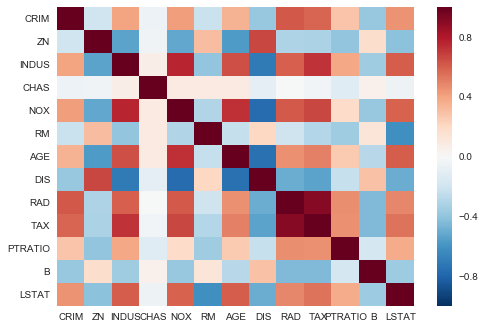

In [185]:
sns.heatmap(X.corr())

上記の図のように、どの変数ともCHASはあまり関係していないので、dropしておく。

In [78]:
X_droped_CHAS = X.drop("CHAS",axis=1)
X_droped_CHAS

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


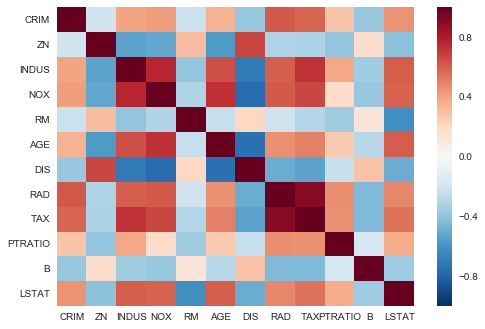

In [82]:
X_droped_CHAS.corr()
sns.heatmap(X_droped_CHAS.corr())

データフレームから特徴量を総当たりで試す可能性も含めて、特徴量の名前だけリスト化にしておく。

In [213]:
X_NAMES=X_droped_CHAS.columns
X_NAMES=set(X_NAMES)
X_NAMES

{'AGE',
 'B',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'TAX',
 'ZN'}

とりあえずの方針として相関が高い方から3つまでを特徴量として選び、説明変数にすることにする。
そのために、各特徴量と相関が高いものを(自分自身は除き)3つまでをリストアップしたものを用意する。

In [264]:
X_corr=X_droped_CHAS.corr().reset_index()
#X_corr
X_corr_each_top3=[]              # 相関が高い方から3つ選んだDataFrameを入れるためのリスト
X_corr_each_worst3 =[]         #  相関が低い方から3つ選んだDataFrameを入れるためのリスト


for i in X_corr.columns[1:]:
    X_corr_each_top3.append(X_corr[i].reset_index().set_index("index").sort_values(by=i ,ascending = False).head(4))
    X_corr_each_worst3.append(X_corr[i].reset_index().set_index("index").sort_values(by=i ,ascending = False).tail(4))
       
X_corr_each_top3[0]



Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


,CRIM
index,
0,1.000000
7,0.622029
8,0.579564
11,0.452220


In [272]:
X_top_pickup3 = X_droped_CHAS.iloc[:,[0,7,8,11]].reset_index()
X_top_pickup3

,index,CRIM,RAD,TAX,LSTAT
0,0,0.00632,1.0,296.0,4.98
1,1,0.02731,2.0,242.0,9.14
2,2,0.02729,2.0,242.0,4.03
3,3,0.03237,3.0,222.0,2.94
4,4,0.06905,3.0,222.0,5.33
5,5,0.02985,3.0,222.0,5.21
6,6,0.08829,5.0,311.0,12.43
7,7,0.14455,5.0,311.0,19.15
8,8,0.21124,5.0,311.0,29.93
9,9,0.17004,5.0,311.0,17.10


In [273]:
score(X_top_pickup3,y,0.2)      # 　CRIMと相関が高い特徴量3つで回帰

Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、1次で回帰した場合の決定係数は0.01235863739301768
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、2次で回帰した場合の決定係数は0.062345999046864324
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、3次で回帰した場合の決定係数は0.1594301150510452
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、4次で回帰した場合の決定係数は0.3331286671156295
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、5次で回帰した場合の決定係数は0.5893961104979386
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、6次で回帰した場合の決定係数は0.6692904710290675
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、7次で回帰した場合の決定係数は0.81856874757063
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、8次で回帰した場合の決定係数は0.9061625135726129
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、9次で回帰した場合の決定係数は0.9441280505609869
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'], dtype='object')を説明変数にし、10次で回帰した場合の決定係数は0.8994065374872439
Index(['CRIM', 'RAD', 'TAX', 'LSTAT'],

KeyboardInterrupt: 

In [274]:
X_corr_each_top3[1]

,ZN
index,
1,1.000000
6,0.664408
4,0.311991
10,0.175520


In [276]:
X_top_pickup3 = X_droped_CHAS.iloc[:,[1,6,4,10]].reset_index()     # ZNと相関が高い特徴量3つで回帰
X_top_pickup3
score(X_top_pickup3,y,0.2)

Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、1次で回帰した場合の決定係数は0.0028787619104183593
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、2次で回帰した場合の決定係数は0.03359479920645381
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、3次で回帰した場合の決定係数は-7.0952146206012525
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、4次で回帰した場合の決定係数は-11.20535668075151
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、5次で回帰した場合の決定係数は0.5492438115658864
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、6次で回帰した場合の決定係数は0.6525412473534
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、7次で回帰した場合の決定係数は0.681435523124066
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、8次で回帰した場合の決定係数は0.7614341236241553
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、9次で回帰した場合の決定係数は0.8169951326137734
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、10次で回帰した場合の決定係数は0.859163869156226
Index(['ZN', 'DIS', 'RM', 'B'], dtype='object')を説明変数にし、11次で回帰した場合の決定係数は0.8780613403018277
Index(['ZN', 'DIS',

KeyboardInterrupt: 

もう十分成果はでているし、計算に時間がかかりすぎるのでやめます。